#Correlation vs mode number

In [1]:
%pylab inline
sys.path.append('/home/photon/code/PylonCCD')
import Qfunction as Qfunc
import scipy.stats as sp

Populating the interactive namespace from numpy and matplotlib


In [2]:
vacuum_focal_raw = np.load("/home/photon/data/06-17-2014/15-45-53_raw.npy")

In [3]:
focal_raw = np.load("/home/photon/data/06-17-2014/16-02-11_raw.npy")

In [4]:
unblocked_raw = np.load("/home/photon/data/06-18-2014/10-53-56_raw.npy")

In [5]:
vacuum_unblocked_raw = np.load("/home/photon/data/06-18-2014/10-15-21_raw.npy")

In [6]:
unblocked_vacFFT = np.average(vacuum_unblocked_raw,axis=(1,2))

In [7]:
focal_vacFFT = np.average(vacuum_focal_raw,axis=(1,2))

In [8]:
VacCorrectedFocal = focal_raw - focal_vacFFT.reshape(600,1,1)

In [9]:
VacCorrectedUnblocked = unblocked_raw - unblocked_vacFFT.reshape(600,1,1)

In [10]:
modeA = 169
outputF = VacCorrectedFocal[modeA,:,:].flatten()  # Choose the mode to analyze
outputU = VacCorrectedUnblocked[modeA,:,:].flatten()  # Choose the mode to analyze
y_realF = np.real(outputF)
y_imagF = np.imag(outputF)
y_realU = np.real(outputU)
y_imagU = np.imag(outputU)
x_realF = []
x_realU = []
x_imagF = []
x_imagU = []
x_absF = []
x_absU = []
outputF = []
outputU = []
Pearson_realF = []
Pearson_realU = []
Pearson_imagF = []
Pearson_imagU = []
magnitudeF = []
magnitudeU = []
modes = range(0,200)
theta = []
single_mode_vacuumF = []
single_mode_vacuumU = []
x_vacF = []
x_vacU = []
scale_factorF = sqrt(2.0)/13101
scale_factorU = sqrt(2.0)/13077
photon_numberF = []
photon_numberU = []
    
for i in modes:
    outputF.append(VacCorrectedFocal[i,:,:].flatten())
    outputU.append(VacCorrectedUnblocked[i,:,:].flatten())
    x_realF.append(np.real(outputF[i]))
    x_realU.append(np.real(outputU[i])) 
    x_imagF.append(np.imag(outputF[i]))
    x_imagU.append(np.imag(outputU[i]))
    x_absF.append(np.abs(outputF[i]))
    x_absU.append(np.abs(outputU[i]))
    RealPearsonF, p = sp.pearsonr(x_realF[i], y_realF)
    RealPearsonU, p = sp.pearsonr(x_realU[i], y_realU)
    ImagPearsonF, p = sp.pearsonr(x_imagF[i], y_imagF)
    ImagPearsonU, p = sp.pearsonr(x_imagU[i], y_imagU) 
    magnitudeF.append(np.average(x_absF[i]))
    magnitudeU.append(np.average(x_absU[i]))
    Pearson_realF.append(RealPearsonF)
    Pearson_realU.append(RealPearsonU)
    Pearson_imagF.append(ImagPearsonF)
    Pearson_imagU.append(ImagPearsonU)
    theta.append(modes[i] * (780e-9*20e6)/(600))

    #single_mode_vacuumF.append(vacuum_focal_raw[i,:,:].flatten())
    #x_vacF.append(np.real(single_mode_vacuumF[i]))
    #scale_factorF.append(1/(2*x_vacF[i].std()))
    #single_mode_vacuumU.append(vacuum_unblocked_raw[i,:,:].flatten())
    #x_vacU.append(np.real(single_mode_vacuumU[i]))
    #scale_factorU.append(1/(2*x_vacU[i].std()))
    photon_numberF.append((np.average(np.abs(scale_factorF*outputF[i])))**2)
    photon_numberU.append((np.average(np.abs(scale_factorU*outputU[i])))**2)

/usr/lib64/python2.7/site-packages/scipy/stats/stats.py:2417: RuntimeWarning: invalid value encountered in double_scalars
  r = (r_num / r_den)


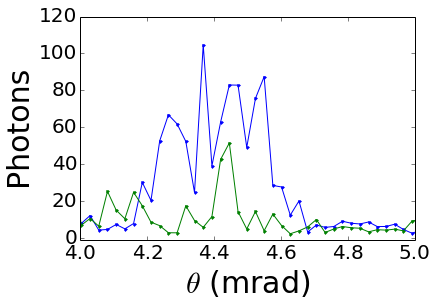

In [11]:
plot(theta[150:200], photon_numberF[150:200] ,".-")
plot(theta[150:200], photon_numberU[150:200] ,".-")
xlabel("$\\theta$ (mrad)",fontsize=30)
ylabel("Photons",fontsize=30)
xlim((4,5))
ylim((-1,120))
tick_params(labelsize=20)

[3.5, 5, -1.1, 1.1]

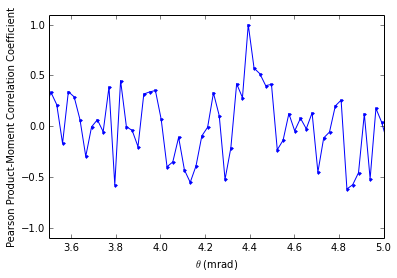

In [12]:
plot(theta,Pearson_realF,".-")
#plot(theta,Pearson_realU,".-")
xlabel("$\\theta$ (mrad)")
ylabel("Pearson Product-Moment Correlation Coefficient")
axis([3.5,5,-1.1,1.1])

[3.5, 5, -1.1, 1.1]

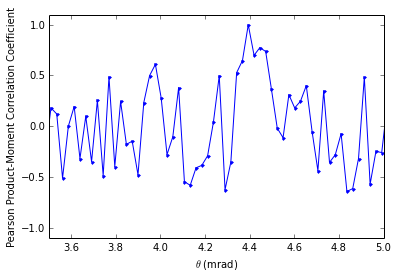

In [13]:
plot(theta,Pearson_imagF,".-")
#plot(theta,Pearson_imagU,".-")
xlabel("$\\theta$ (mrad)")
ylabel("Pearson Product-Moment Correlation Coefficient")
axis([3.5,5,-1.1,1.1])